In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as stats
mJ = 317.8

In [3]:
planets = pd.read_csv("./data/gasGiantData.csv")

hotJupiters = planets.loc[planets["pl_type"] == "HJ"]
warmJupiters = planets.loc[planets["pl_type"] == 'WJ']
coldJupiters = planets.loc[planets["pl_type"] == "CJ"]
warmColdJupiters = pd.concat((warmJupiters, coldJupiters))
gasGiants = pd.concat((warmColdJupiters, hotJupiters))

loneGasGiants = gasGiants.loc[gasGiants["sy_pnum"] == 1]
superJupiters = planets.loc[planets["pl_bmasse"] > 5*mJ]

"""
Companion Type is a product of primes so that I can identify the categories a companion belongs to with a single number
2: Super Earths
3: Hot Saturns
5: Cold Saturns
7: Hot Jupiters
11: Warm Jupiters
13: Cold Jupiters
"""

seCompanions = planets.loc[(planets["companion_type"] % 2 == 0)]
hjCompanions = planets.loc[(planets["companion_type"] % 7 == 0)]
wcjCompanions = planets.loc[(planets["companion_type"] % 11 == 0) | (planets["companion_type"] % 13 == 0)]


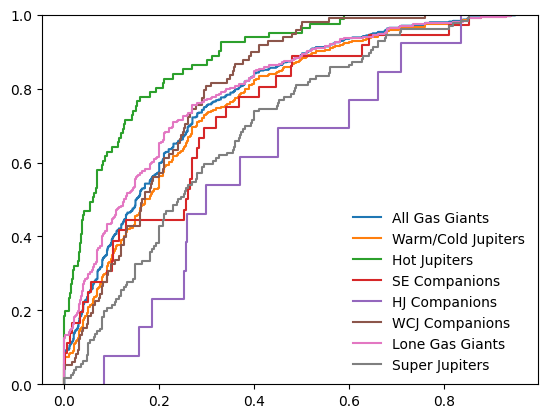

In [4]:
fig, ax = plt.subplots(1,1)

ax.ecdf(gasGiants["pl_orbeccen"].dropna(), label = "All Gas Giants")
ax.ecdf(warmColdJupiters["pl_orbeccen"].dropna(), label = "Warm/Cold Jupiters")
ax.ecdf(hotJupiters["pl_orbeccen"].dropna(), label = "Hot Jupiters")
ax.ecdf(seCompanions["pl_orbeccen"].dropna(), label = "SE Companions")
ax.ecdf(hjCompanions["pl_orbeccen"].dropna(), label = "HJ Companions")
ax.ecdf(wcjCompanions["pl_orbeccen"].dropna(), label = "WCJ Companions")
ax.ecdf(loneGasGiants["pl_orbeccen"].dropna(), label= "Lone Gas Giants")
ax.ecdf(superJupiters["pl_orbeccen"].dropna(), label = "Super Jupiters")
ax.legend(frameon = False)



In [5]:
stats.kstest(gasGiants["pl_orbeccen"].dropna(), hjCompanions["pl_orbeccen"].dropna())

KstestResult(statistic=0.4390068886337543, pvalue=0.009646792480524722, statistic_location=0.25, statistic_sign=1)

In [6]:
stats.rayleigh.fit(gasGiants["pl_orbeccen"].dropna(), floc = 0)

FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'rayleigh' requires that 1 < (x - loc)/scale  < inf for each x in `data`.

In [7]:
superEarths = planets.loc[planets["pl_type"] == "SE"]
hotSaturns = planets.loc[planets["pl_type"] == "HS"]
coldSaturns = planets.loc[planets["pl_type"] == 'CS']
saturns = pd.concat((hotSaturns, coldSaturns))



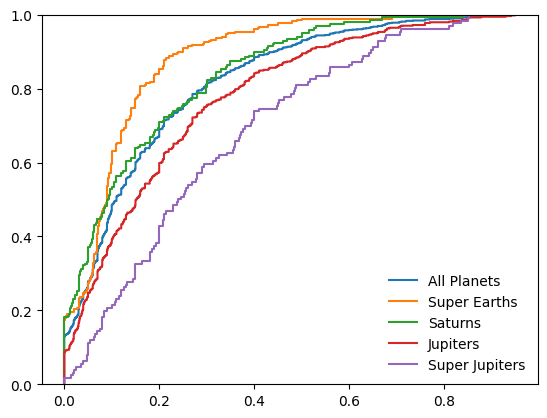

In [8]:
fig, ax = plt.subplots(1,1)
ax.ecdf(planets["pl_orbeccen"].dropna(), label = 'All Planets')
ax.ecdf(superEarths["pl_orbeccen"].dropna(), label = "Super Earths")
ax.ecdf(saturns["pl_orbeccen"].dropna(), label = 'Saturns')
ax.ecdf(gasGiants["pl_orbeccen"].dropna(), label = "Jupiters")
ax.ecdf(superJupiters["pl_orbeccen"].dropna(), label = "Super Jupiters")
ax.legend(frameon = False)

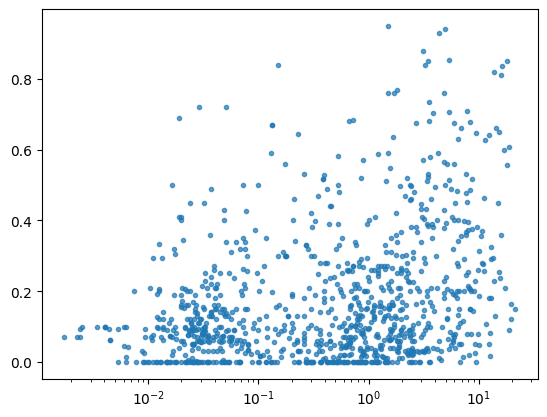

In [9]:
fig,ax = plt.subplots(1,1)
ax.plot(planets["pl_bmasse"]/mJ, planets["pl_orbeccen"], ls = "", marker = ".", alpha = 0.7)
ax.set_xscale("log")

In [11]:
print(np.median(gasGiants["pl_orbeccen"].dropna()))

0.15189999999999998
